In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-09-19 09:10:05--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.128, 142.250.73.240, 172.217.13.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   125MB/s    in 0.5s    

2020-09-19 09:10:06 (125 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path

local_zip = Path('/tmp/cats_and_dogs_filtered.zip')
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
base_dir = Path('/tmp/cats_and_dogs_filtered')
train_dir = base_dir / Path('train')
validation_dir = base_dir / Path('validation')

In [5]:
train_cats_dir = train_dir / Path('cats')
train_dogs_dir = train_dir / Path('dogs')

In [6]:
validation_cats_dir = validation_dir / Path('cats')
validation_dogs_dir = validation_dir / Path('dogs')

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [39]:
model = tf.keras.models.Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPool2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D(2,2), 
    Conv2D(128, (3,3), activation='relu'),
    MaxPool2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPool2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [40]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-4),metrics=['accuracy'])

In [41]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [42]:
train_generator = train_datagen.flow_from_directory( train_dir, target_size=(150,150), batch_size=20, class_mode='binary')
validation_generator = train_datagen.flow_from_directory( validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [43]:
history = model.fit(train_generator, steps_per_epoch=100, epochs=100, validahistoryata=validation_generator, validation_steps=50)

Epoch 1/100
100/100 [==============================] - 8s 78ms/step - loss: 0.6883 - accuracy: 0.5445 - val_loss: 0.6852 - val_accuracy: 0.5030
Epoch 2/100
100/100 [==============================] - 7s 71ms/step - loss: 0.6576 - accuracy: 0.6070 - val_loss: 0.6397 - val_accuracy: 0.6520
Epoch 3/100
100/100 [==============================] - 7s 75ms/step - loss: 0.6093 - accuracy: 0.6725 - val_loss: 0.6039 - val_accuracy: 0.6800
Epoch 4/100
100/100 [==============================] - 8s 75ms/step - loss: 0.5598 - accuracy: 0.7135 - val_loss: 0.5764 - val_accuracy: 0.6920
Epoch 5/100
100/100 [==============================] - 7s 71ms/step - loss: 0.5221 - accuracy: 0.7510 - val_loss: 0.5764 - val_accuracy: 0.6930
Epoch 6/100
100/100 [==============================] - 8s 81ms/step - loss: 0.4963 - accuracy: 0.7535 - val_loss: 0.5578 - val_accuracy: 0.7260
Epoch 7/100
100/100 [==============================] - 8s 79ms/step - loss: 0.4629 - accuracy: 0.7760 - val_loss: 0.5482 - val_accuracy:

In [46]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [47]:
epochs = range(len(acc))

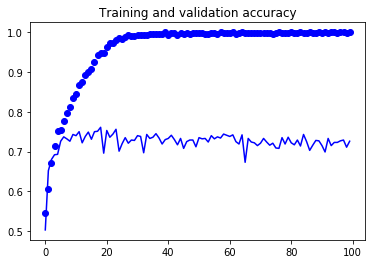

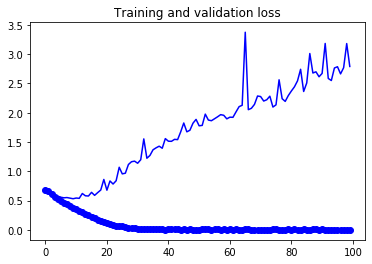

In [50]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')

plt.show()